In [1]:
import os
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import pearsonr, gaussian_kde, linregress, ttest_ind, sem, zscore
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from scipy.stats import percentileofscore
from sklearn.utils.validation import check_random_state
from math import factorial
from more_itertools import distinct_permutations
import statsmodels.api as sm

import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, ParameterGrid, train_test_split
from tqdm.notebook import tqdm

import warnings
import random
#from torch.utils.data import SubsetRandomSampler
from sklearn.utils import resample

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.diagnostic import linear_harvey_collier
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from colorama import Fore, Style, init
from sklearn.metrics import roc_auc_score
from collections import Counter

from statsmodels.stats.diagnostic import linear_harvey_collier
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from colorama import Fore, Style, init
from sklearn.metrics import roc_auc_score
from pygam import LinearGAM, s


warnings.filterwarnings("ignore")



## Load data

In [2]:
data = pd.read_csv('data/BBAG-cross.csv')
data = data[data.country != 'Slovakia'].reset_index(drop =  True)

## Scatter plot

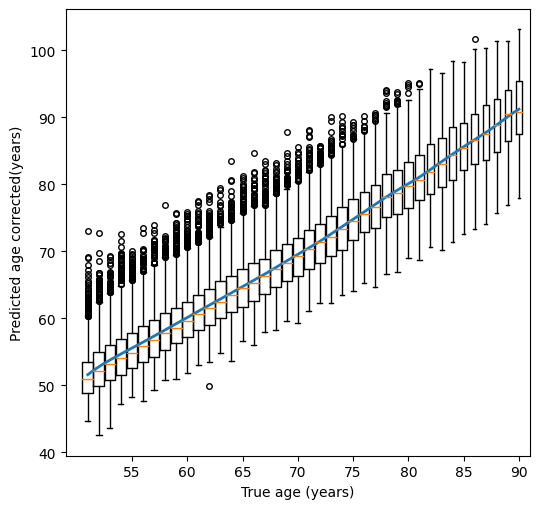

In [3]:


df = data[['Age', 'y_pred_corrected']].replace([np.inf, -np.inf], np.nan).dropna().copy()

ages_sorted = np.sort(df['Age'].unique())
data_by_age = [df.loc[df['Age'] == a, 'y_pred_corrected'].values for a in ages_sorted]

fig, ax = plt.subplots(figsize=(5.5, 5.2))

ns = np.array([len(v) for v in data_by_age])
widths = 0.2 + 0.8 * (np.sqrt(ns) / np.sqrt(ns).max()) 

bp = ax.boxplot(
    data_by_age,
    positions=ages_sorted,         
    widths=widths,
    patch_artist=False,
    showfliers=True
)

for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='none', markersize=4, markeredgewidth=1)

xmin, xmax = df['Age'].min(), df['Age'].max()

X = df['Age'].values.reshape(-1, 1)
y = df['y_pred_corrected'].values

gam = LinearGAM(s(0, n_splines=20)).fit(X, y)

x_grid = np.linspace(xmin, xmax, 300)
y_gam = gam.predict(x_grid)
ax.plot(x_grid, y_gam, linewidth=2)


ax.set_xlabel("True age (years)")
ax.set_ylabel("Predicted age corrected(years)")

xmin, xmax = ax.get_xlim()
tick_start = np.ceil(xmin/5)*5
tick_end = np.floor(xmax/5)*5
if tick_end < xmax:
    tick_end += 5  # incluir un tick más si es necesario
ticks = np.arange(tick_start, tick_end + 1, 5)
ax.set_xticks(ticks)
ax.set_xticklabels([f"{int(t)}" for t in ticks], rotation=0)
ax.set_xlim([49, 91])


plt.tight_layout()

plt.show()